#### Este código ha sido copiado a un acompañera, Sara Sendino, para tratar de ver de dónde viene el warning y averiguar qué diferencias hay entre nuestros programas para que salgan diferentes resultados

Modelo SVM Lineal:


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


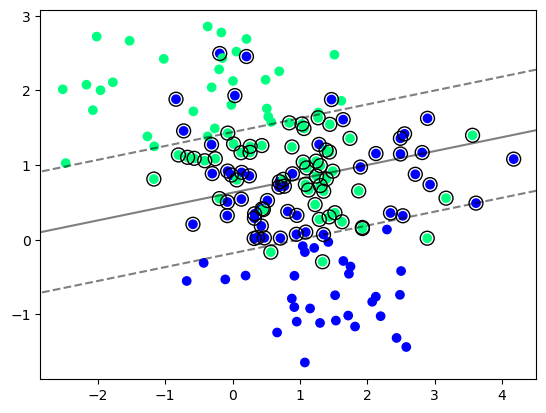

Modelo SVM Radial:
Mejores parámetros:  {'C': 1, 'gamma': 1.0}


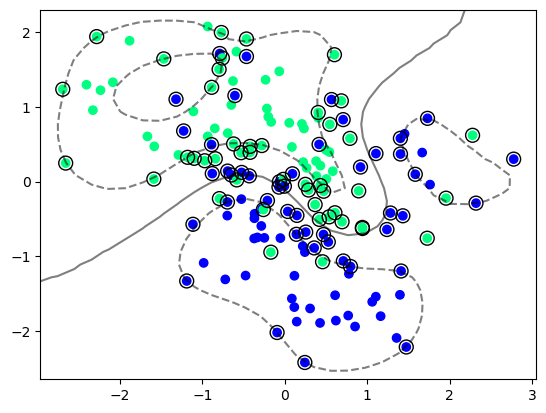

Precisión en el conjunto de prueba:  0.75


In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Lectura de datos
df = pd.read_csv("ejemplo_dataset.csv")

# Preprocesamiento y separación de variables
X = df[["X1", "X2"]]
y = df["y"]

# División de los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Escalado de las variables para el modelo rbf
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Creación y entrenamiento del modelo SVM lineal
svm_linear_model = SVC(kernel="linear")
svm_linear_model.fit(x_train, y_train)

# Creación y entrenamiento del modelo SVM (kernel RBF) con grid search-Hago pruebas con diferentes hiperparametros para quedarme con el mas adecuado

param_grid = {'gamma': [0.1, 0.5, 1.0], 'C': [1, 5, 10]}
svm_radial_model = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_radial_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Función para dibujar los vectores de soporte, márgenes y línea divisoria
def plot_svm_model(model, x, y):
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Crear cuadrícula para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Límites y márgenes del modelo
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.show()

# Dibujar el modelo SVM lineal
print("Modelo SVM Lineal:")
plot_svm_model(svm_linear_model, x_train.to_numpy(), y_train)

# Dibujar el modelo SVM radial con grid search
print("Modelo SVM Radial:")
print("Mejores parámetros: ", grid_search.best_params_)
svm_radial_model = grid_search.best_estimator_
plot_svm_model(svm_radial_model, x_train_scaled, y_train)

# Evaluación de la precisión en el conjunto de prueba
y_pred = svm_radial_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba: ", accuracy)